In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [7]:
df = pd.read_hdf('data/train.h5')
df.set_index('id', inplace=True)

In [8]:
excl = ['id', 'sample', 'y', 'timestamp']
cols = [c for c in df.columns if c not in excl]

# Exploration

In [7]:
df.head()

,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,
10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,-0.097903,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,0.196391,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [21]:
print(df.shape)
print(df.columns)

from collections import Counter
col_prefix = [col.split('_')[0] for col in df.columns]
counter = Counter(col_prefix)
print(counter)

(1710756, 110)
Index(['timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       'fundamental_3',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=110)
Counter({'fundamental': 63, 'technical': 40, 'derived': 5, 'y': 1, 'timestamp': 1})


In [46]:
df[['fundamental_0', 'derived_0', 'technical_0']].dropna().describe()

,fundamental_0,derived_0,technical_0
count,1.607638e+06,1.607638e+06,1.607638e+06
mean,-2.119612e-02,-4.620310e+00,-1.102305e-01
std,2.496711e-01,2.520681e+02,2.709089e-01
min,-2.263502e+00,-2.017497e+04,-1.000000e+00
25%,-2.008817e-01,-1.451062e-01,-4.206659e-03
50%,-4.122555e-02,-8.751260e-04,-4.011782e-09
75%,1.304721e-01,1.195569e-01,-3.636746e-26
max,1.378195e+00,3.252527e+03,0.000000e+00


In [ ]:
df['fundamental_0'].nunique()

In [ ]:
# Count number of unique per column
# df[['fundamental_0', 'derived_0', 'technical_0']].apply(pd.Series.nunique)

In [43]:
# Number of missing values
n = df.shape[0]
nas = df.isnull().sum()/n
print("total: {:.0%}".format(nas.mean()))

print(nas * 100)

timestamp          0.000000
derived_0          4.264723
derived_1          4.736444
derived_2         23.302622
derived_3          8.737131
derived_4         23.758970
fundamental_0      1.399791
fundamental_1     39.694147
fundamental_2     21.560059
fundamental_3     26.560187
fundamental_5     56.233618
fundamental_6     41.012570
fundamental_7      1.539670
fundamental_8     21.812929
fundamental_9     33.059478
fundamental_10     6.603922
fundamental_11    21.560059
fundamental_12     6.480819
fundamental_13    20.759126
fundamental_14    20.814424
fundamental_15    20.745039
fundamental_16    20.759126
fundamental_17     5.682985
fundamental_18     0.925497
fundamental_19     3.190870
fundamental_20     6.480819
fundamental_21     3.175964
fundamental_22    32.645684
fundamental_23    20.851775
fundamental_24    33.707612
                    ...    
technical_13       0.278473
technical_14       0.829107
technical_16       1.167963
technical_17       0.250123
technical_18       1

In [3]:
# target = df['y']
# df = df[col]

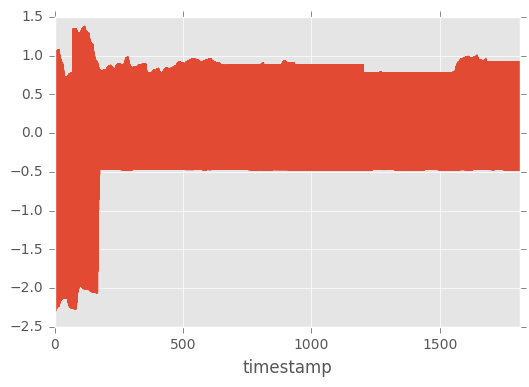

In [8]:
df.set_index('timestamp')['fundamental_0'].plot()

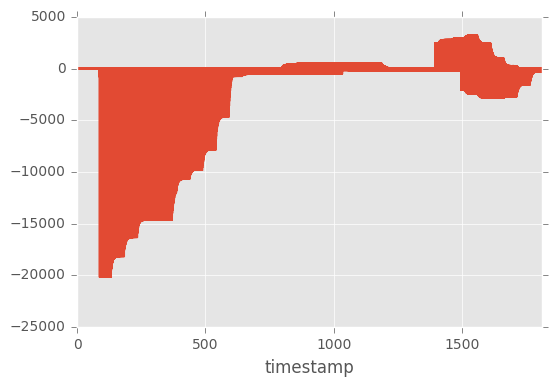

In [12]:
df.set_index('timestamp')['derived_0'].plot()

In [13]:
df.set_index('timestamp')['technical_0'].plot()

OverflowError: In draw_path: Exceeded cell block limit

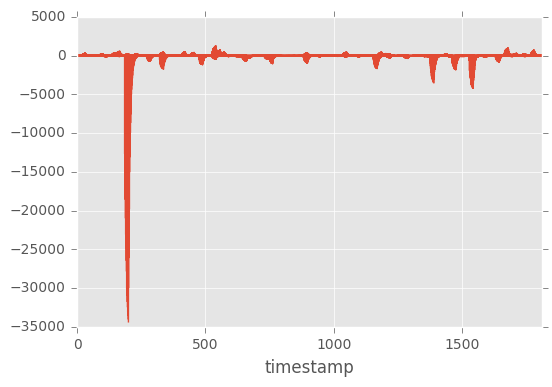

In [9]:
df.set_index('timestamp')['derived_3'].plot()

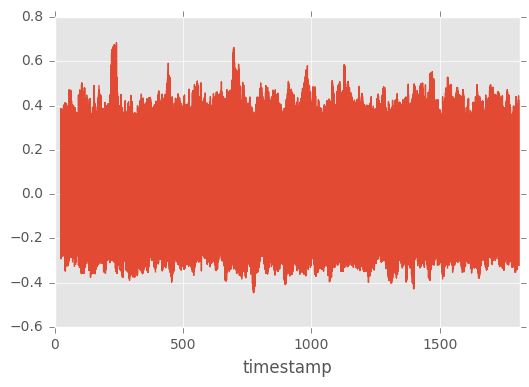

In [10]:
df.set_index('timestamp')['technical_41'].plot()

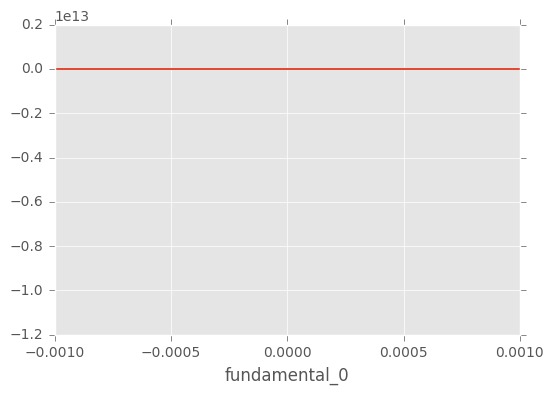

In [11]:
df.set_index('fundamental_0')['fundamental_1'].plot()

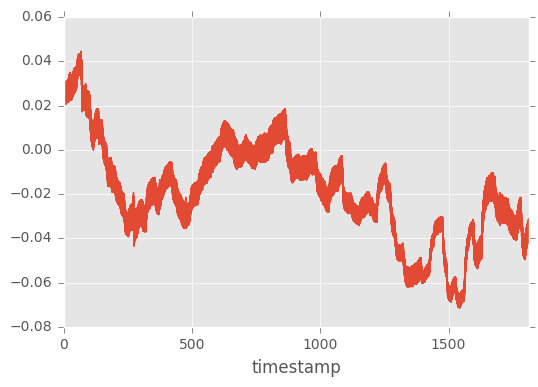

In [30]:
# Seasonal pattern?
series = df.set_index('timestamp')['fundamental_0'].ffill()
series = series.rolling(window=1000).mean()
series.plot()

In [44]:
dir()

['Counter',
 'In',
 'Out',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_25',
 '_28',
 '_3',
 '_30',
 '_31',
 '_32',
 '_33',
 '_34',
 '_35',
 '_36',
 '_37',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'col',
 'col_prefix',
 'collections',
 'counter',
 'df',
 'excl',
 'exit',
 'get_ipython',
 'n',
 'nas',
 'pd',
 'plt',
 'quit',
 'seasonal_plot',
 'series',
 'train']

# Prediction

In [10]:
target = df['y']
feature = df[cols].ffill().fillna(0)

In [11]:
def split_train_test(feature, target, cutoff_test = 1000):
    """
    Divide features and targets into train and test
    """

    ind_test = df.index >= cutoff_test
    feature_test = feature[ind_test]
    target_test = target[ind_test]

    ind_train = ~ind_test
    feature_train = feature[ind_train]
    target_train = target[ind_train]
    
    return feature_train, feature_test, target_train, target_test

# Apply split
feature_train, feature_test, target_train, target_test = split_train_test(feature, target)

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# LassoCV since L1 norm promotes sparsity of features
clf = LassoCV()
# sfm = SelectFromModel(clf, threshold = 1e-7)
sfm = SelectFromModel(clf, threshold = "mean")
sfm.fit(feature_train, target_train)
# NOTE had to disable mkl as discussed here: https://github.com/BVLC/caffe/issues/3884

feature_kept = feature.columns[sfm.get_support()]
print("Features: {}".format(feature_kept))

Features: Index(['fundamental_17'], dtype='object')


In [23]:
# Keep only most important features
feature_train = pd.DataFrame(sfm.transform(feature_train), 
                             columns = feature_kept, index = feature_train.index)
feature_test = pd.DataFrame(sfm.transform(feature_test), 
                            columns = feature_kept, index = feature_test.index)

In [12]:
# Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Quick cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(reg, feature, target, cv = 5)
print("R^2 during CV: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std() * 2))

R^2 during CV: -0.00 +/- 0.00


In [13]:
scores

array([ -2.15486809e-05,  -2.19587117e-04,  -1.82689104e-04,
        -1.49654342e-04,  -1.04837679e-04])